In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
df=pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [85]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [86]:
df.shape

(918, 12)

In [87]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [88]:
df_str=df.select_dtypes(include='object')
df_str.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


In [90]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


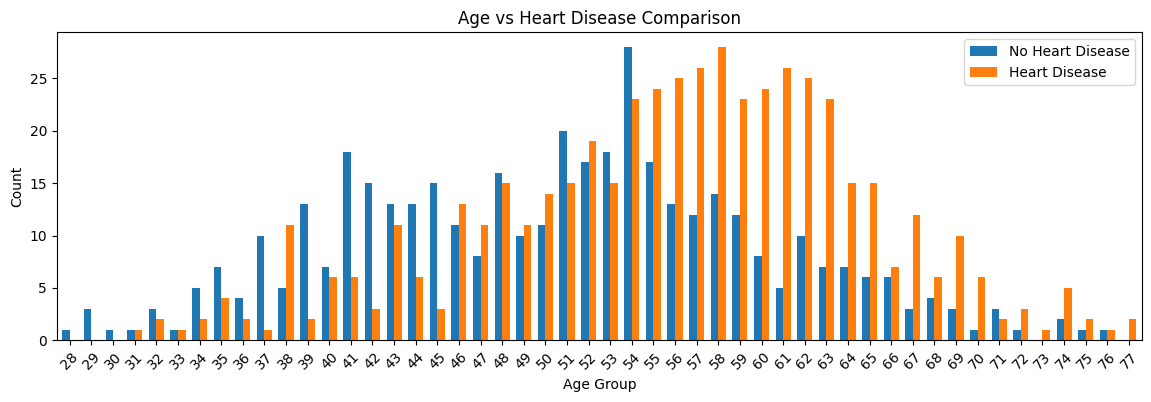

In [117]:

age_counts = df.groupby(['Age', 'HeartDisease']).size().unstack(fill_value=0)

age_counts.plot(kind='bar', width=0.7,figsize=(14,4))

plt.title("Age vs Heart Disease Comparison")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(["No Heart Disease", "Heart Disease"])
plt.xticks(rotation=45)
plt.show()


The double-bar graph compares heart disease prevalence across age groups. The likelihood of heart disease rises sharply after age 50, with the highest risk between 55 and 65. In contrast, the peak for individuals without heart disease occurs around age 54. For those under 30, the chance of heart disease is minimal, indicating younger groups are largely unaffected

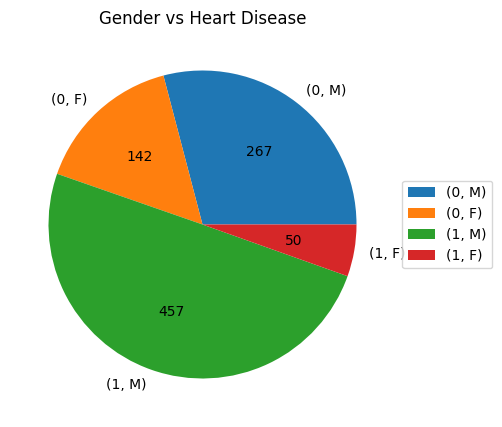

In [92]:
count = df.groupby('HeartDisease')['Sex'].value_counts()
count.plot(kind='pie',figsize=(5,5),autopct=lambda p: f'{int(p*count.sum()/100)}')
plt.title("Gender vs Heart Disease")
plt.ylabel("")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

The chart shows that men (63%) are more likely to have heart disease compared to women (26%). Most heart disease cases are found in men, while women make up a smaller share. Among those without heart disease, women (74%) outnumber men (37%), showing a clear difference. Overall, the data highlights that men are more vulnerable to heart disease, while women tend to have better outcomes in both cases.

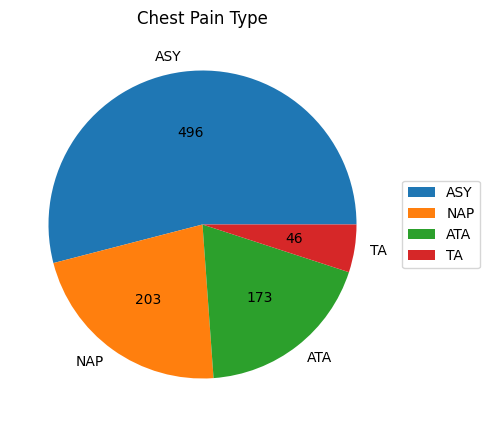

In [93]:
count=df['ChestPainType'].value_counts()

count.plot(kind='pie',figsize=(5,5),autopct=lambda p: f'{int(p*count.sum()/100)}')
plt.title("Chest Pain Type")
plt.ylabel("")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

ASY(Asymptomatic) chest pain is the most common type, followed by NAP (Non-Anginal) and ATA (Atypical Angina), while TA (Typical Angina) is the least frequent. This shows that most patients present with non-classical or no chest pain symptoms.

In [89]:
unique_counts = {col: df_str[col].nunique() for col in df_str.columns}
unique_counts

{'Sex': 2,
 'ChestPainType': 4,
 'RestingECG': 3,
 'ExerciseAngina': 2,
 'ST_Slope': 3}

In [95]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [96]:
df['ChestPainType']=df['ChestPainType'].astype('category').cat.codes
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,1,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,2,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,1,130,283,0,ST,98,N,0.0,Up,0
3,48,F,0,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,2,150,195,0,Normal,122,N,0.0,Up,0


In [97]:
df['Sex']=df['Sex'].map({'M':0 , 'F':1})
df['RestingECG']=df['RestingECG'].astype('category').cat.codes
df['ExerciseAngina']=df['ExerciseAngina'].astype('category').cat.codes
df['ST_Slope']=df['ST_Slope'].astype('category').cat.codes
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,140,289,0,1,172,0,0.0,2,0
1,49,1,2,160,180,0,1,156,0,1.0,1,1
2,37,0,1,130,283,0,2,98,0,0.0,2,0
3,48,1,0,138,214,0,1,108,1,1.5,1,1
4,54,0,2,150,195,0,1,122,0,0.0,2,0


In [98]:
from sklearn.model_selection import train_test_split as tts
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [109]:
X=df[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']]
Y=df['HeartDisease']
model = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=model, n_features_to_select=5)
fit = rfe.fit(X, Y)

print("Selected Features:", fit.support_)
print("Feature Ranking:", fit.ranking_)

Selected Features: [False  True  True False False  True False False  True False  True]
Feature Ranking: [3 1 1 6 7 1 4 5 1 2 1]


In [102]:
cols=['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']
res=[]
for i in range(len(fit)):
    if fit[i]==True:
        res.append(cols[i])
res

['Sex', 'ChestPainType', 'FastingBS', 'ExerciseAngina', 'ST_Slope']

In [107]:
target=df['HeartDisease']
df1=df[res]
df1.head()

,Sex,ChestPainType,FastingBS,ExerciseAngina,ST_Slope
0,0,1,0,0,2
1,1,2,0,0,1
2,0,1,0,0,2
3,1,0,0,1,1
4,0,2,0,0,2


In [108]:
x,x_,y,y_=tts(df1,target,test_size=0.2,random_state=40)

In [110]:
model = LogisticRegression(max_iter=1000)
model.fit(x, y)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [112]:
from sklearn.metrics import f1_score

y_pred = model.predict(x_)

print("F1 Score:", f1_score(y_, y_pred))


F1 Score: 0.8847926267281107
